#            IRIS DATA CLASSIFICATION


## The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

In [23]:
#IMPORTING NECCASARY LIBRARIES
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [24]:
#LOADIND DATASET

df=pd.read_csv('C:/Users/ragesh/Downloads/iris.csv')

In [25]:
#UNDERSTANDING THE DATASET
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [29]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
df.shape

(150, 5)

In [31]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

# DATA PREPROCCESING

In [32]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Outliers in sepal_length: []
Outliers in sepal_width: [15]
Outliers in petal_length: []
Outliers in petal_width: []


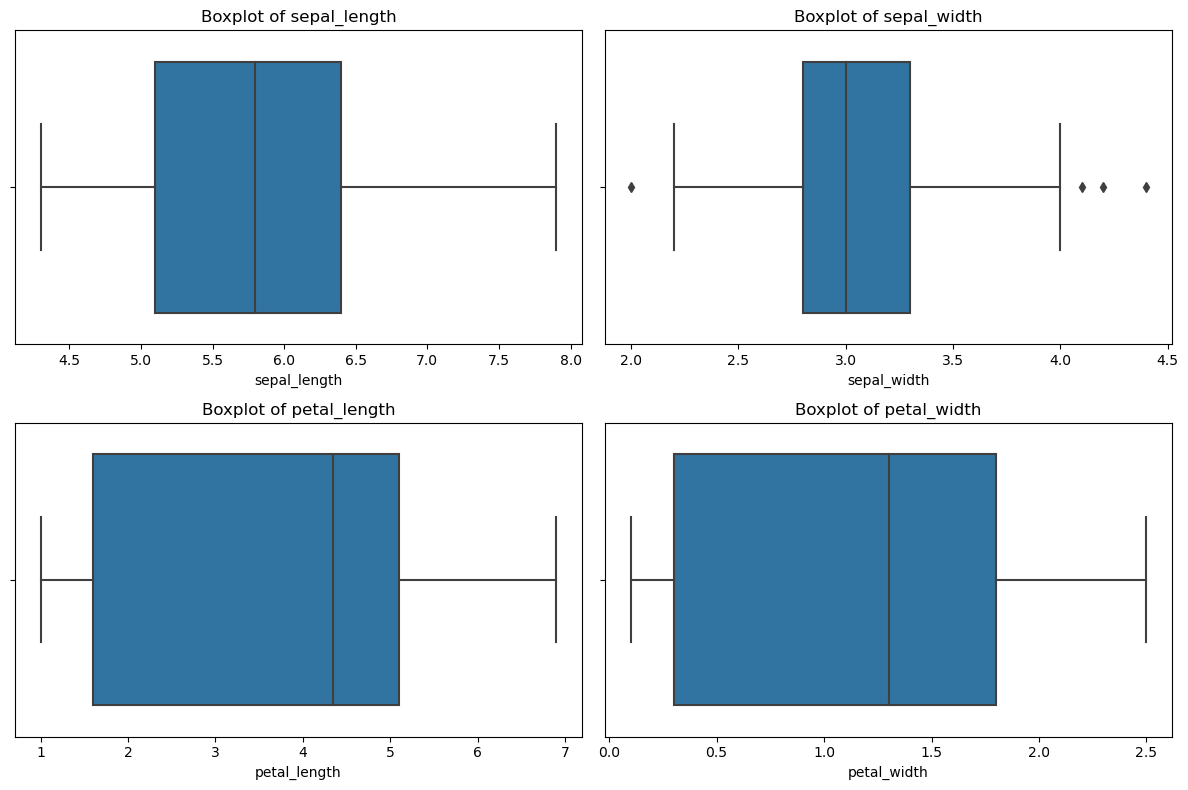

In [35]:
# Identify outliers 
import matplotlib.pyplot as plt
from scipy import stats



# Extract numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns

# Calculate Z-scores for each numerical column
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Set a threshold for Z-score (e.g., 3 standard deviations)
threshold = 3
outliers = np.where(z_scores > threshold)

# Identify and print outliers for each numerical column
for i, col in enumerate(numerical_columns):
    column_outliers = outliers[0][outliers[1] == i]
    print(f"Outliers in {col}: {column_outliers}")

# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()



In [37]:
#REMOVING OULIERS
# Create a boolean mask for non-outliers
non_outliers_mask = np.all(z_scores <= threshold, axis=1)

# Create a new DataFrame without outliers
df1 = df[non_outliers_mask]

# Display the shape of the original and new DataFrames
print("Original DataFrame shape:", df.shape)
print("DataFrame shape without outliers:", df_no_outliers.shape)

Original DataFrame shape: (150, 5)
DataFrame shape without outliers: (149, 5)


###Non_outliers_mask is a boolean mask that is True for rows that are not outliers and False for rows that are outliers. The new DataFrame, df_no_outliers, is created by selecting only the rows without outliers.

# DATA EXPLORATION

Text(0.5, 1.0, 'Correlation Matrix')

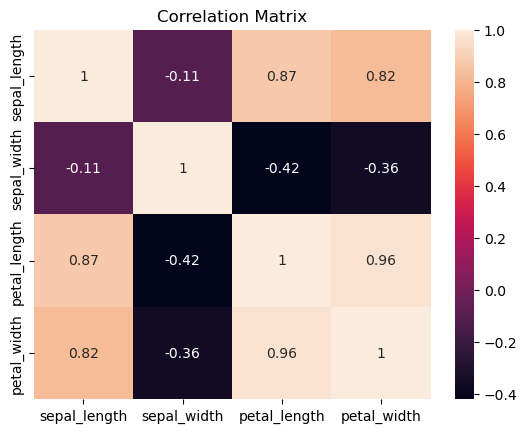

In [38]:
correlation_matrix = df.corr(numeric_only = True)
ax = sns.heatmap(correlation_matrix, annot = True)
ax.set_title('Correlation Matrix')

C:\Users\ragesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


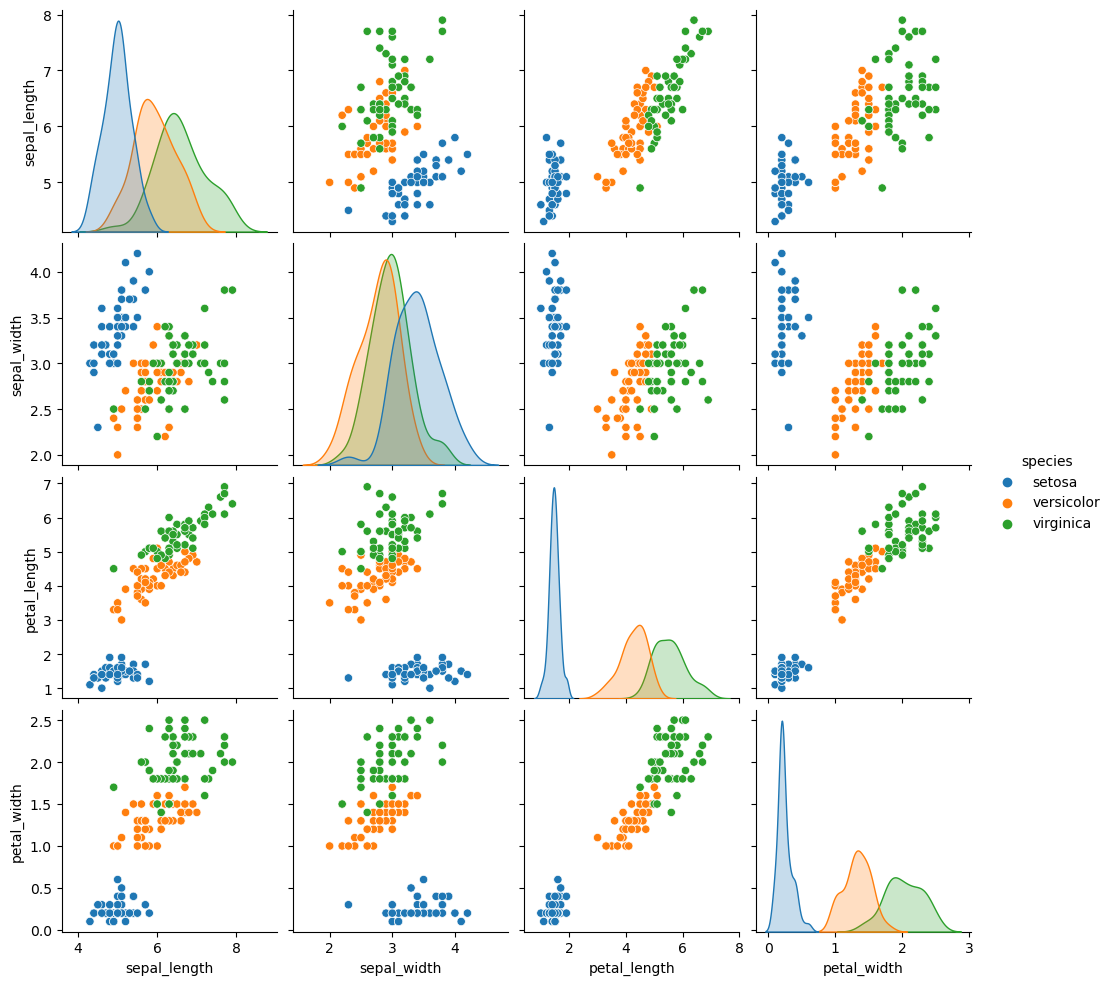

In [40]:
# shows the bivariate relation between each pair of features
# The diagonal elements in a pairplot show the histogram by default
ax = sns.pairplot(df1, 
                  hue='species', 
                 # corner=True
                 )

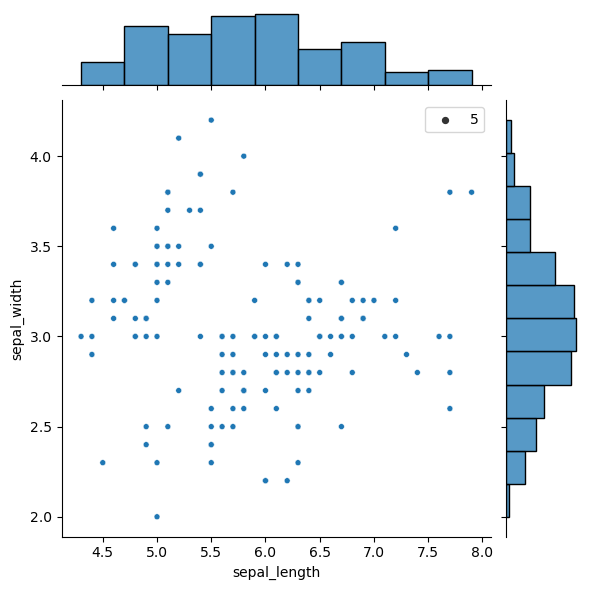

In [41]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
ax = sns.jointplot(x="sepal_length", y="sepal_width", data=df1, size=5)


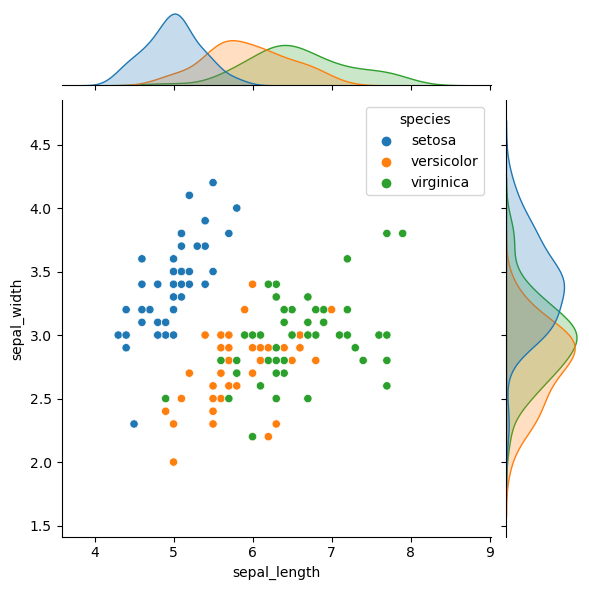

In [43]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
ax = sns.jointplot(x="sepal_length", y="sepal_width", hue='species',data=df1,color='b')

# DATA MODELLING


In [46]:
X_sepal, Y_sepal = df[['sepal_length','sepal_width']], df['species']

X_petal, Y_petal = df[['petal_length','petal_width']], df['species']

In [47]:
#DATA SPLITTING
X_trian_sepal, X_test_sepal, y_trian_sepal, y_test_sepal = train_test_split(X_sepal, Y_sepal, test_size=0.2,random_state=42)

X_trian_petal, X_test_petal, y_trian_petal, y_test_petal = train_test_split(X_petal, Y_petal, test_size=0.2,random_state=42)


In [48]:
#DECESION TREE
model = DecisionTreeClassifier()
model.fit(X_trian_sepal,y_trian_sepal) 
prediction = model.predict(X_test_sepal) 
sepal_dec_t_accuracy = accuracy_score(prediction,y_test_sepal)*100
print(f'The accuracy of the Decision Tree using Sepals is: {sepal_dec_t_accuracy:.2f}')

The accuracy of the Decision Tree using Sepals is: 63.33


In [49]:
model = DecisionTreeClassifier()
model.fit(X_trian_petal, y_trian_petal) 
prediction = model.predict(X_test_petal) 
petal_dec_t_accuracy = accuracy_score(prediction,y_test_petal)*100
print(f'The accuracy of the Decision Tree using Petals is: {petal_dec_t_accuracy:.2f}')

The accuracy of the Decision Tree using Petals is: 100.00


In [50]:
#ADABOOST CLASSIFIER
#ENSEMBLING TECHNIQUE


X = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
Y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
# Create a base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Create an AdaBoostClassifier using the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Fit the AdaBoostClassifier to the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions
predictions = adaboost_classifier.predict(X_test)

In [57]:
# Get the first decision tree (stump) from the AdaBoost ensemble
!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz
stump_classifier = adaboost_classifier.estimators_[0]

# Visualize the stump using Graphviz
dot_data = export_graphviz(
    stump_classifier,
    out_file=None,
    feature_names=df.columns[:-1],
    class_names=np.unique(Y),
    filled=True,
    rounded=True
)
plt.figure(figsize=(10,6))
graph = graphviz.Source(dot_data)
graph


     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     -------------------------------------- 47.0/47.0 kB 117.6 kB/s eta 0:00:00


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 1000x600 with 0 Axes>

In [58]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted') 
recall = recall_score(y_test, predictions, average='weighted')  # Adjust 'average' as needed
f1 = f1_score(y_test, predictions, average='weighted')
# -----------------------------------
print(f"accuracy: {accuracy*100:.3f}")
print(f"precision: {precision*100:.3f}")
print(f"recall: {recall*100:.3f}")
print(f"F1: {f1*100:.3f}")

accuracy: 100.000
precision: 100.000
recall: 100.000
F1: 100.000


<Axes: >

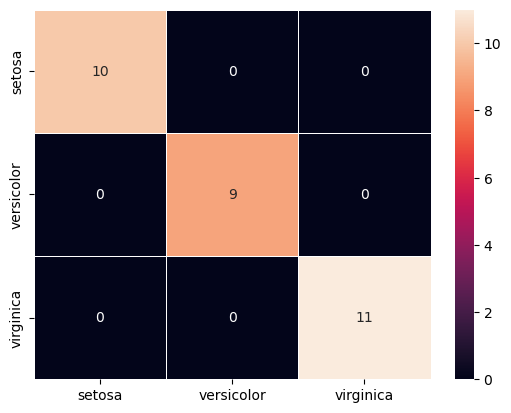

In [59]:
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
sns.heatmap(conf_matrix, annot=True, linewidth=.5)

In [60]:
class_report = classification_report(predictions, y_test, target_names=np.unique(df['species']))
print("\n       ********** Classification Report **********\n\n", class_report)


       ********** Classification Report **********

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# conclusion
Using petal length ,we get high accuracy
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.
